In [138]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf

from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

In [139]:
df = pd.read_csv('./data.csv')

In [140]:
df.head()

,num_ligne,ID_Client,Nom,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   num_ligne       10000 non-null  int64  
 1   ID_Client       10000 non-null  int64  
 2   Nom             10000 non-null  object 
 3   Score_Credit    10000 non-null  int64  
 4   Pays            10000 non-null  object 
 5   Sex             10000 non-null  object 
 6   Age             10000 non-null  int64  
 7   Tenure          10000 non-null  int64  
 8   Balance         10000 non-null  float64
 9   Num_Produit     10000 non-null  int64  
 10  il_a_CrCard     10000 non-null  int64  
 11  Membre_actif    10000 non-null  int64  
 12  Salaire_estime  10000 non-null  float64
 13  Exited          10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [142]:
df.isnull().sum()

num_ligne         0
ID_Client         0
Nom               0
Score_Credit      0
Pays              0
Sex               0
Age               0
Tenure            0
Balance           0
Num_Produit       0
il_a_CrCard       0
Membre_actif      0
Salaire_estime    0
Exited            0
dtype: int64

<AxesSubplot:>

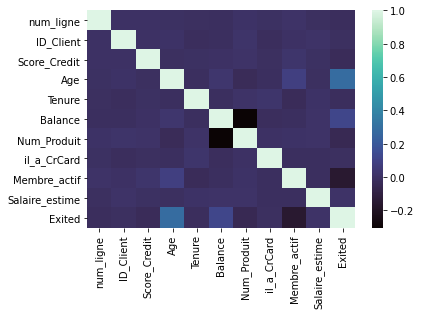

In [143]:
sns.heatmap(df.corr(), cmap="mako")

In [144]:
dummies = ['Pays','Sex']
df.work = pd.get_dummies(df,columns=dummies,drop_first=True)

In [145]:
X = df.work.iloc[:, 3:-1].values
Y = df.work.iloc[:,-1].values.reshape(-1, 1)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [147]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [148]:
# Modèle Random Tree Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [149]:
clf.score(X_test, y_test)

0.5172727272727272

In [150]:
# Modèle Random Tree Forest avec PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)

clf.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [151]:
X_test_pca = pca.transform(X_test)
clf.score(X_test_pca, y_test)

0.5172727272727272

In [152]:
# Modèle avec une régression logistique
clf = LogisticRegression(max_iter=100, random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [153]:
clf.score(X_test, y_test)

0.5648484848484848

In [154]:
# Modèle avec une régression logistique avec PCA
pca_log = PCA(n_components=2)
X_train_pca = pca_log.fit_transform(X_train)

clf.fit(X_train_pca, y_train)

LogisticRegression(random_state=42)

In [155]:
X_test_pca = pca_log.transform(X_test)
clf.score(X_test_pca, y_test)

0.5527272727272727

In [156]:
# Réseau de neurones
train_df = df.sample(frac=0.8, random_state=0)
test_df = df.drop(train_df.index)

In [157]:
train_features = train_df.copy()
test_features = test_df.copy()

train_target = train_features.pop('Exited')
test_target = test_features.pop('Exited')

In [158]:
X_train = np.asarray(X_train, dtype='float32')
y_train = np.asarray(y_train, dtype='float32')
X_test = np.asarray(X_test, dtype='float32')
y_test = np.asarray(y_test, dtype='float32')

In [159]:
for i in range(10):
    X_train = np.concatenate((X_train, X_train), axis=0)
    y_train = np.concatenate((y_train, y_train), axis=0)

In [160]:
model = models.Sequential()
model.add(layers.Dense(11, kernel_initializer = "uniform", activation='relu', input_shape=(11,)))
model.add(layers.Dense(22, kernel_initializer = "uniform", activation='relu'))
#model.add(layers.Dense(96, kernel_initializer = "uniform", activation='relu'))
model.add(layers.Dense(1, kernel_initializer = "uniform",  activation='sigmoid'))

In [161]:
model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=['accuracy'])

In [162]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

/214400 [==============================] - 121s 563us/step - loss: 0.6284 - accuracy: 0.6425 - val_loss: 0.7801 - val_accuracy: 0.5085
Epoch 4/10
214400/214400 [==============================] - 120s 560us/step - loss: 0.6256 - accuracy: 0.6482 - val_loss: 0.7845 - val_accuracy: 0.5088
Epoch 5/10
214400/214400 [==============================] - 120s 562us/step - loss: 0.6248 - accuracy: 0.6503 - val_loss: 0.7788 - val_accuracy: 0.5000
Epoch 6/10
214400/214400 [==============================] - 121s 563us/step - loss: 0.6235 - accuracy: 0.6519 - val_loss: 0.7834 - val_accuracy: 0.5109
Epoch 7/10
214400/214400 [==============================] - 121s 565us/step - loss: 0.6221 - accuracy: 0.6534 - val_loss: 0.7834 - val_accuracy: 0.4976
Epoch 8/10
214400/214400 [==============================] - 121s 565us/step - loss: 0.6206 - accuracy: 0.6522 - val_loss: 0.7831 - val_accuracy: 0.5115
Epoch 9/10
214400/214400 [==============================] - 122s 570us/step - loss: 0.6197 - accuracy: 0.

In [163]:
pred = model.predict(X_test)
pred = (pred > 0.50)

In [164]:
conf = confusion_matrix(y_test, pred)
conf

array([[693, 819],
       [789, 999]])

<AxesSubplot:>

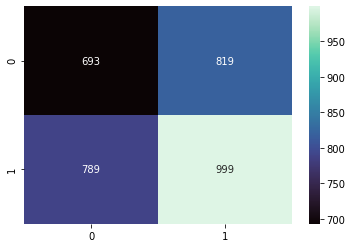

In [165]:
sns.heatmap(conf, cmap='mako', annot=True, fmt='d')